# Prepare data

In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
  
# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y_full = myocardial_infarction_complications.data.targets 
  
# metadata 
print(myocardial_infarction_complications.metadata) 
  
# variable information 
print(myocardial_infarction_complications.variables) 

y = np.array(y_full)[:, -4] # Select one target variable to predict

{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'tit

## Visualize

In [12]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

n = X.shape[0]
p = X.shape[1]
δ = n/p
print("δ: ", δ)
L = 2

# Plot a seaborn pairplot of the data
import seaborn as sns
import pandas as pd
df = pd.DataFrame(X)
df['y'] = y
sns.pairplot(df.sample(1000))
plt.show()

# Plot useful seaborn plots of the data
sns.boxplot(data=df.sample(1000))
plt.show()

sns.violinplot(data=df.sample(1000))
plt.show()

sns.heatmap(df.sample(1000).corr())
plt.show()

# Plot a seaborn pairplot of the log-transformed data
df = pd.DataFrame(np.log(X))
df['y'] = y
sns.pairplot(df.sample(1000))
plt.title("Log-transformed data")
plt.show()




δ:  15.315315315315315


## Transform data

Proportion of nans in X:  AGE           0.000042
SEX           0.000000
INF_ANAM      0.000021
STENOK_AN     0.000562
FK_STENOK     0.000387
                ...   
ANT_CA_S_n    0.000069
GEPAR_S_n     0.000090
ASP_S_n       0.000090
TIKL_S_n      0.000085
TRENT_S_n     0.000085
Length: 111, dtype: float64
Proportion of infs in X:  AGE           0.0
SEX           0.0
INF_ANAM      0.0
STENOK_AN     0.0
FK_STENOK     0.0
             ... 
ANT_CA_S_n    0.0
GEPAR_S_n     0.0
ASP_S_n       0.0
TIKL_S_n      0.0
TRENT_S_n     0.0
Length: 111, dtype: float64
Proportion of nans in X (rows):  AGE           0.004706
SEX           0.000000
INF_ANAM      0.002353
STENOK_AN     0.062353
FK_STENOK     0.042941
                ...   
ANT_CA_S_n    0.007647
GEPAR_S_n     0.010000
ASP_S_n       0.010000
TIKL_S_n      0.009412
TRENT_S_n     0.009412
Length: 111, dtype: float64
Proportion of nans in X (cols):  0       0.081081
1       0.027027
2       0.027027
3       0.081081
4       0.027027
         

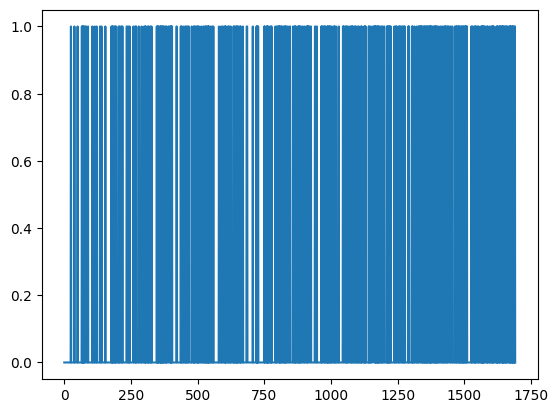

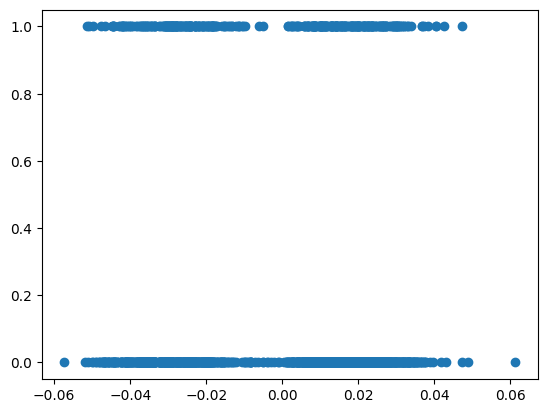

Proportion of 0s in y:  0.71276593
Proportion of 1s in y:  0.28723404


In [2]:
# Whiten the data
import numpy as np
import jax.numpy as jnp
from scipy.linalg import sqrtm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Print the proportion of nans and infs in the dataset
print("Proportion of nans in X: ", np.isnan(X).sum() / (X.shape[0] * X.shape[1]))
print("Proportion of infs in X: ", np.isinf(X).sum() / (X.shape[0] * X.shape[1]))

# Print the proportion of rows which have nans in the dataset
print("Proportion of nans in X (rows): ", np.isnan(X).sum(axis = 0) / X.shape[0])
print("Proportion of nans in X (cols): ", np.isnan(X).sum(axis = 1) / X.shape[1])

# Remove any rows with nans in the dataset
# X_clean = X[~np.isnan(X).any(axis=1)]
# y_clean = y[~np.isnan(X).any(axis=1)]

X_array = np.array(X)

# Remove the rows with nans in the 'AGE' column of X
print("Rows with nans in the 'AGE' column: ", np.isnan(X_array[:, 0]).sum())
X_clean = X_array[~np.isnan(X_array[:, 0])]
y_clean = np.array(y)[~np.isnan(X_array[:, 0])]

# Add a column of ones to the end of the dataset (for the intercept) # No point in doing this now, as we are going to whiten the data and the intercept will be removed by its mean
# X_clean = np.hstack((X_clean, np.ones((X_clean.shape[0], 1))))

# Order the dataset by the 'AGE' column of X and remove the 'AGE' column. Sort y accordingly.
X_to_sort = np.array(X_clean)
print("Sorted ages: ", X_to_sort[np.argsort(X_to_sort[:, 0])])
y_sorted = y_clean[np.argsort(X_to_sort[:, 0])]
X_sorted = X_to_sort[np.argsort(X_to_sort[:, 0])]
X_sorted = X_sorted[:, 1:]

n = X_sorted.shape[0]
p = X_sorted.shape[1]
δ = n/p
print("n, p, δ: ", n, p, δ)

# X_white = np.nan_to_num(X_sorted, nan=0.0)
# Print the proportion of nans and infs in the dataset
print("Proportion of nans in X_sorted: ", np.isnan(X_sorted).sum() / (X_sorted.shape[0] * X_sorted.shape[1]))
print("Proportion of infs in X_sorted: ", np.isinf(X_sorted).sum() / (X_sorted.shape[0] * X_sorted.shape[1]))
# Replace nans with interpolation
X_white = np.nan_to_num(X_sorted, nan=np.nanmean(X_sorted, axis=0))
# X_white = np.array(X_white.astype(float) - np.mean(X_white, axis=1).reshape((n, 1)).astype(float), dtype='float64')
X_white = X_white - X_white.mean(axis=0)


# Check X_white for nans and infs
print("X_white has nans: ", np.isnan(X_white).any())
print("X_white has infs: ", np.isinf(X_white).any())
# Right-multiply X_white by the square root of the inverse of the covariance matrix
X_white = jnp.real(jnp.array(X_white @ sqrtm(np.linalg.pinv(1/n * X_white.T @ X_white + 1e-6 * jnp.eye(p)))))

print("Whitened covariance: ", 1/n * X_white.T @ X_white)

# Add a column of ones to the end of the dataset (for the intercept)
# X_white = np.hstack((X_white, np.ones((X_white.shape[0], 1))))
# p = p + 1

# X_partial_log_white = X - np.mean(X, axis=0)
# X_partial_log_white = jnp.array(X_partial_log_white @ sqrtm(np.linalg.inv(1/n * X_partial_log_white.T @ X_partial_log_white)))

# # Plot a seaborn pairplot of the log-transformed data
# df = pd.DataFrame(X_partial_log_white)
# df['y'] = y
# sns.pairplot(df)
# plt.title("Log-transformed data")
# plt.show()

# Map the covariates to a gaussian distribution using scikit-learn's PowerTransformer
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer()
# X_gaussian = pt.fit_transform(X)

# # Plot a seaborn pairplot of the gaussian-transformed data
# df = pd.DataFrame(X_gaussian)
# df['y'] = y
# sns.pairplot(df.sample(1000))
# plt.title("Gaussian-transformed data")
# plt.show()

# Print the covariance matrix of the gaussian-transformed data
# print("Covariance matrix of the gaussian-transformed data: ", 1/n * X_gaussian.T @ X_gaussian)
# Whiten the data using this covariance matrix
# X_gaussian_white = X_gaussian - np.mean(X_gaussian, axis=0)
# X_gaussian_white = jnp.array(X_gaussian_white @ sqrtm(np.linalg.inv(1/n * X_gaussian.T @ X_gaussian)))
# print("Covariance matrix of the gaussian-transformed data whitened: ", 1/n * X_gaussian_white.T @ X_gaussian_white)

# Set the final data to be used in the analysis
X_prep = X_white
# X_prep = X_gaussian
X_prep = X_prep * np.sqrt(1/n) # Scale appropriately, according to AMP
y_prep = jnp.array(y_sorted > 0).astype(int)

print("Whitened (unit) covariance: ", X_prep.T @ X_prep)

print("X_prep: ", X_prep)
print("y_prep: ", y_prep)

plt.plot(y_prep)
plt.show()

plt.scatter(X_prep[:, 0], y_prep)
plt.show()

# Print the proportion of 0s and 1s in the target variable

print("Proportion of 0s in y: ", (y_prep[int(n/2):] == 0).sum() / int(n - n/2))
print("Proportion of 1s in y: ", (y_prep[int(n/2):] == 1).sum() / int(n - n/2))


# Run AMP (estimating number of change points)

In [3]:
import numpy as np
import jax.numpy as jnp # Not used in any randomness, all randomness is in numpy
import numpy.random as nprandom
import matplotlib.pyplot as plt
from amp import norm_sq_corr, PAL
from amp.marginal_separable_jax_logistic import q, GAMP_full, GAMP_gaussian_clean
import amp.signal_configuration
from amp.signal_configuration import unif_prior_to_η_ϕ, unif_prior_to_η_ϕ_combinations
from amp.signal_priors import SignalPrior, SparseDiffSignal, SparseGaussianSignal, GaussianSignal
import amp.posterior_logistic
from amp.signal_priors import GaussianSignal
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)


# --- Preliminaries ---

T = 10
σ = 0.1
L = 2
# Changepoint locations
Δ = lambda n: int(n/200)
Lmin = 1
Lmax = L
p_l = 1/L * np.ones(L) # puts equal weight on all number of signals, set None otherwise. Best for estimating size. 
num_valid_configs, η_arr, p_η_arr, ϕ = unif_prior_to_η_ϕ_combinations(Lmin, Lmax, Δ(n), n, p_l = p_l) # Lxn matrix
assert η_arr.shape == (num_valid_configs, Lmax-1) and \
    len(p_η_arr) == num_valid_configs
assert ϕ.shape == (Lmax, n)

# Gaussian Signal Prior
B̃_cov = 1.0 * np.eye(L)
B̃_cov[0, 1] = 0.75
B̃_cov[1, 0] = 0.75
signal_prior = GaussianSignal(B̃_cov)

B̃ = signal_prior.sample(p)
ρ = 1/δ * 1/p * B̃.T @ B̃
B̂_0 = signal_prior.sample(p)

# Generate the observation vector Y
# X_prep = np.random.normal(0, np.sqrt(1/n), (n, p))
# Θ = X @ B̃
# ε = np.random.rand(n) # uniform dist
C_true = jnp.zeros(n).astype(int)
# Y = q(Θ, jnp.ones(n).astype(int), ε) 

# B̂, Θ_t, ν_arr, κ_T_arr, ν̂_arr, κ_B_arr, ν_fixed_arr, κ_T_fixed_arr, ν̂_fixed_arr, κ_B_fixed_arr = GAMP_full(B̃, δ, p, ϕ, σ, X_prep, y_prep, C_true, T, B̂_0, signal_prior, signal_prior, st_ζ = None, verbose = False, seed = None, tqdm_disable = False)
B̂, Θ_t, ν, ν̂  = GAMP_gaussian_clean(B̂_0, δ, p, ϕ, L, σ, X_prep, y_prep, ρ, T, prior = None, verbose=False, seed=None, tqdm_disable = False)
κ_T = ν - ν.T @ jnp.linalg.inv(ρ) @ ν

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1674 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1676 [00:00<?, ?it/s]

Change point estimation:  [1065]


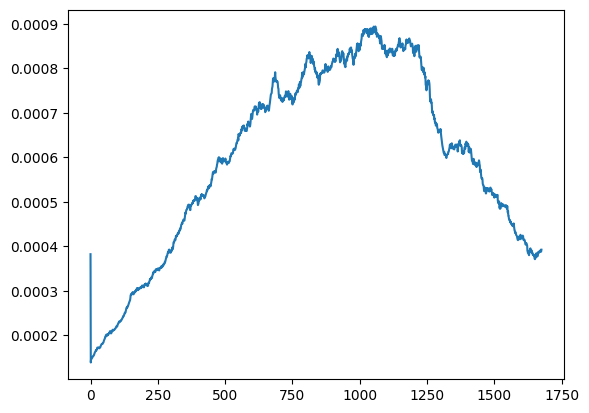

In [4]:
κ_T = ν - ν.T @ jnp.linalg.inv(ρ) @ ν
ψ_arr_amp, η_idx_amp = amp.signal_configuration.η_to_ψ_jax_combinations_mapped(η_arr, n, L)       
post_amp = amp.posterior_logistic.compute_approx_posterior(ψ_arr_amp, Θ_t, y_prep, n, ρ, σ, ν, κ_T)
map_idx_amp = np.argmax(post_amp)
ψ̂ = ψ_arr_amp[map_idx_amp]
η̂ = η_arr[η_idx_amp[map_idx_amp]]
η̂ = η̂[η̂ > 0]
print("Change point estimation: ", η̂)
plt.plot(post_amp)

# Compute the exact posterior probability of at least one change point 

In [3]:
# Subsample the data according to all unique values of age
unique_ages, unique_age_indices = np.unique(np.sort(X['AGE'].values), return_index=True) # already sorted, as per numpy.unique documentation
print("unique ages: ", unique_ages)
print("unique age indices: ", unique_age_indices)

X_prep[unique_age_indices]

unique ages:  [26. 27. 30. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.
 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.
 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82.
 83. 84. 85. 86. 87. 88. 90. 92. nan]
unique age indices:  [   0    1    3    4    7   10   16   21   23   37   50   55   62   72
   91  117  140  159  173  185  194  221  259  291  348  389  429  482
  526  579  609  651  701  755  834  924  992 1073 1127 1177 1216 1253
 1319 1353 1387 1419 1453 1492 1528 1558 1584 1602 1624 1636 1649 1665
 1672 1677 1679 1683 1688 1690 1692]


Array([[-0.04482664,  0.00206696, -0.01275453, ...,  0.01469101,
        -0.00052439, -0.01098575],
       [ 0.01486968, -0.01207763, -0.01814399, ...,  0.00979828,
        -0.00388983, -0.00766304],
       [ 0.00983927, -0.0089316 , -0.01365663, ...,  0.01227648,
        -0.01039757, -0.01441109],
       ...,
       [-0.01314671,  0.00106457,  0.03607184, ...,  0.00905431,
        -0.00124115, -0.01009579],
       [ 0.03039828, -0.02387101,  0.03947051, ...,  0.01730191,
        -0.00501684,  0.04893575],
       [-0.01220129, -0.02433452, -0.0090588 , ...,  0.02048287,
         0.00091778, -0.00928111]], dtype=float32)

In [4]:
import numpy as np
import jax.numpy as jnp # Not used in any randomness, all randomness is in numpy
import numpy.random as nprandom
import matplotlib.pyplot as plt
from amp import norm_sq_corr, PAL
from amp.marginal_separable_jax_logistic import q, GAMP_full, GAMP_gaussian_clean
import amp.signal_configuration
from amp.signal_configuration import unif_prior_to_η_ϕ, unif_prior_to_η_ϕ_combinations
from amp.signal_priors import SignalPrior, SparseDiffSignal, SparseGaussianSignal, GaussianSignal
import amp.posterior_logistic
from amp.signal_priors import GaussianSignal
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)

# --- Preliminaries ---

T = 10
σ = 0.1
L = 2
# Changepoint locations
Δ = lambda n: int(n/500)
Lmin = 1
Lmax = L
p_l = 1/L * np.ones(L) # puts equal weight on all number of signals, set None otherwise. Best for estimating size. 
# p_l = None
num_valid_configs, η_arr, p_η_arr, ϕ = unif_prior_to_η_ϕ(Lmin, Lmax, Δ(n), n, p_l = p_l) # Lxn matrix
assert η_arr.shape == (num_valid_configs, Lmax-1) and \
    len(p_η_arr) == num_valid_configs
assert ϕ.shape == (Lmax, n)

# Plot the posterior over a subsampled region
# Δ = lambda n: 1
# n_subsampled = int(unique_age_indices.shape[0])
# print("n_subsampled: ", n_subsampled)
# _, η_arr_subsampled, p_η_arr_subsampled, _ = unif_prior_to_η_ϕ(Lmin, Lmax, Δ(n_subsampled), n_subsampled) # Lxn matrix
# η_arr_subsampled = η_arr_subsampled * subsample_factor # Rescale η_arr_subsampled to match η_arr
η_arr_subsampled = unique_age_indices.reshape((unique_age_indices.shape[0], 1))
# Append a np.array([-1, -1]) to the beginning of η_arr_subsampled
η_arr_subsampled = np.vstack((np.array([-1]).reshape((1, 1)), η_arr_subsampled))
p_η_arr_subsampled = np.ones(η_arr_subsampled.shape[0]) / η_arr_subsampled.shape[0]

# Gaussian Signal Prior
B̃_cov = 1.0 * np.eye(L)
B̃_cov[0, 1] = 0.75
B̃_cov[1, 0] = 0.75
signal_prior = GaussianSignal(B̃_cov)

B̃ = signal_prior.sample(p)
ρ = 1/δ * 1/p * B̃.T @ B̃
B̂_0 = signal_prior.sample(p)

# Generate the observation vector Y
# X_prep = np.random.normal(0, np.sqrt(1/n), (n, p))
# Θ = X @ B̃
# ε = np.random.rand(n) # uniform dist
C_true = jnp.zeros(n).astype(int) # This is just a dummy variable that needs to be passed in for the GAMP function in order for it to run, it is not the actual true change point location
# Y = q(Θ, jnp.ones(n).astype(int), ε) 

B̂, Θ_t, ν_arr, κ_T_arr, ν̂_arr, κ_B_arr, ν_fixed_arr, κ_T_fixed_arr, ν̂_fixed_arr, κ_B_fixed_arr = GAMP_full(B̃, δ, p, ϕ, σ, X_prep, y_prep, C_true, T, B̂_0, signal_prior, signal_prior, st_ζ = None, verbose = False, seed = None, tqdm_disable = False)
ν = ν_arr[-1]
κ_T = κ_T_arr[-1]
ν_fixed = ν_fixed_arr[-1]
κ_T_fixed = κ_T_fixed_arr[-1]

ν_fixed_tabulated, κ_T_fixed_tabulated = amp.posterior_logistic.tabulate_state_evolution(η_arr_subsampled, signal_prior, signal_prior, \
                            δ, p, ϕ, L, σ, T, \
                            ν_arr, κ_T_arr, ν̂_arr, κ_B_arr, st_ζ = None, tqdm_disable = False)


amp_post = amp.posterior_logistic.exact_posterior(η_arr_subsampled, p_η_arr_subsampled, Θ_t, y_prep, ρ, σ, ν_fixed_tabulated, κ_T_fixed_tabulated) # σ is only passed in for consistency but is not used

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1684 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

In [5]:
# Report the posterior probability of no change point
print("Posterior probability of no change point: ", amp_post[0])

Posterior probability of no change point:  1.1224402427328099e-10


# Plot an exact posterior over the single change point location

In [3]:
# Subsample the data according to all unique values of age
unique_ages, unique_age_indices = np.unique(np.sort(X['AGE'].values), return_index=True) # already sorted, as per numpy.unique documentation
print("unique ages: ", unique_ages)
print("unique age indices: ", unique_age_indices)

X_prep[unique_age_indices]

unique ages:  [26. 27. 30. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.
 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.
 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82.
 83. 84. 85. 86. 87. 88. 90. 92. nan]
unique age indices:  [   0    1    3    4    7   10   16   21   23   37   50   55   62   72
   91  117  140  159  173  185  194  221  259  291  348  389  429  482
  526  579  609  651  701  755  834  924  992 1073 1127 1177 1216 1253
 1319 1353 1387 1419 1453 1492 1528 1558 1584 1602 1624 1636 1649 1665
 1672 1677 1679 1683 1688 1690 1692]


Array([[-0.04482664,  0.00206696, -0.01275453, ...,  0.01469101,
        -0.00052439, -0.01098575],
       [ 0.01486968, -0.01207763, -0.01814399, ...,  0.00979828,
        -0.00388983, -0.00766304],
       [ 0.00983927, -0.0089316 , -0.01365663, ...,  0.01227648,
        -0.01039757, -0.01441109],
       ...,
       [-0.01314671,  0.00106457,  0.03607184, ...,  0.00905431,
        -0.00124115, -0.01009579],
       [ 0.03039828, -0.02387101,  0.03947051, ...,  0.01730191,
        -0.00501684,  0.04893575],
       [-0.01220129, -0.02433452, -0.0090588 , ...,  0.02048287,
         0.00091778, -0.00928111]], dtype=float32)

In [4]:
import numpy as np
import jax.numpy as jnp # Not used in any randomness, all randomness is in numpy
import numpy.random as nprandom
import matplotlib.pyplot as plt
from amp import norm_sq_corr, PAL
from amp.marginal_separable_jax_logistic import q, GAMP_full, GAMP_gaussian_clean
import amp.signal_configuration
from amp.signal_configuration import unif_prior_to_η_ϕ, unif_prior_to_η_ϕ_combinations
from amp.signal_priors import SignalPrior, SparseDiffSignal, SparseGaussianSignal, GaussianSignal
import amp.posterior_logistic
from amp.signal_priors import GaussianSignal
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)


# --- Preliminaries ---

T = 10
σ = 0.1
L = 2
# Changepoint locations
Δ = lambda n: int(n/500)
Lmin = L
Lmax = L
# p_l = 1/L * np.ones(L) # puts equal weight on all number of signals, set None otherwise. Best for estimating size. 
p_l = None
num_valid_configs, η_arr, p_η_arr, ϕ = unif_prior_to_η_ϕ_combinations(Lmin, Lmax, Δ(n), n, p_l = p_l) # Lxn matrix
assert η_arr.shape == (num_valid_configs, Lmax-1) and \
    len(p_η_arr) == num_valid_configs
assert ϕ.shape == (Lmax, n)

# Plot the posterior over a subsampled region
# Δ = lambda n: 1
# n_subsampled = int(unique_age_indices.shape[0])
# print("n_subsampled: ", n_subsampled)
# _, η_arr_subsampled, p_η_arr_subsampled, _ = unif_prior_to_η_ϕ(Lmin, Lmax, Δ(n_subsampled), n_subsampled) # Lxn matrix
# η_arr_subsampled = η_arr_subsampled * subsample_factor # Rescale η_arr_subsampled to match η_arr
η_arr_subsampled = unique_age_indices.reshape((unique_age_indices.shape[0], 1))
p_η_arr_subsampled = np.ones(η_arr_subsampled.shape[0]) / η_arr_subsampled.shape[0]

# Gaussian Signal Prior
B̃_cov = 1.0 * np.eye(L)
B̃_cov[0, 1] = 0.75
B̃_cov[1, 0] = 0.75
signal_prior = GaussianSignal(B̃_cov)

B̃ = signal_prior.sample(p)
ρ = 1/δ * 1/p * B̃.T @ B̃
B̂_0 = signal_prior.sample(p)

# Generate the observation vector Y
# X_prep = np.random.normal(0, np.sqrt(1/n), (n, p))
# Θ = X @ B̃
# ε = np.random.rand(n) # uniform dist
C_true = jnp.zeros(n).astype(int) # This is just a dummy variable that needs to be passed in for the GAMP function in order for it to run, it is not the actual true change point location
# Y = q(Θ, jnp.ones(n).astype(int), ε) 

B̂, Θ_t, ν_arr, κ_T_arr, ν̂_arr, κ_B_arr, ν_fixed_arr, κ_T_fixed_arr, ν̂_fixed_arr, κ_B_fixed_arr = GAMP_full(B̃, δ, p, ϕ, σ, X_prep, y_prep, C_true, T, B̂_0, signal_prior, signal_prior, st_ζ = None, verbose = False, seed = None, tqdm_disable = False)
ν = ν_arr[-1]
κ_T = κ_T_arr[-1]
ν_fixed = ν_fixed_arr[-1]
κ_T_fixed = κ_T_fixed_arr[-1]

ν_fixed_tabulated, κ_T_fixed_tabulated = amp.posterior_logistic.tabulate_state_evolution(η_arr_subsampled, signal_prior, signal_prior, \
                            δ, p, ϕ, L, σ, T, \
                            ν_arr, κ_T_arr, ν̂_arr, κ_B_arr, st_ζ = None, tqdm_disable = False)


amp_post = amp.posterior_logistic.exact_posterior(η_arr_subsampled, p_η_arr_subsampled, Θ_t, y_prep, ρ, σ, ν_fixed_tabulated, κ_T_fixed_tabulated) # σ is only passed in for consistency but is not used

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1684 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

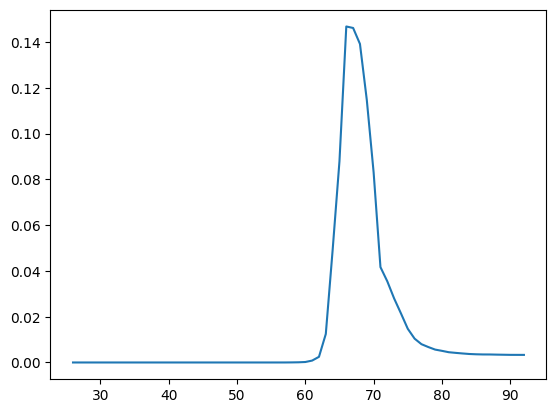

age change point:  66.0


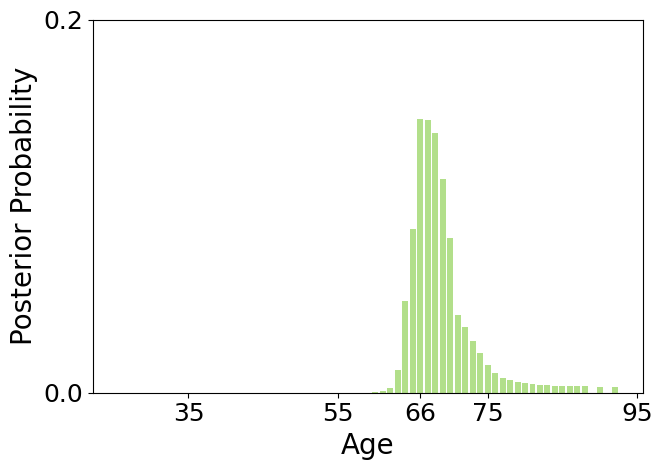

In [7]:
PAL_bg = ["#a6cee3", "#1f78b4", "#b2df8a"]
plt.plot(unique_ages, amp_post)
plt.show()

print("age change point: ", unique_ages[np.argmax(amp_post)])

# Plot a bar plot of the posterior over the change points
plt.bar(unique_ages, amp_post, color=PAL_bg[2])
plt.yticks([0, 0.2], fontsize=18)
plt.xticks([35, 55, 66, 75, 95], fontsize=18)
plt.xlabel("Age", fontsize=20)
plt.tight_layout()
plt.ylabel("Posterior Probability", fontsize=20)
plt.savefig("figures/myocardial_exact_posterior_55_66_75_xtickfontsize_larger.pdf", bbox_inches='tight')
import tikzplotlib
tikzplotlib.save("figures/myocardial_exact_posterior_55_66_75_xtickfontsize_larger.tex")
plt.show()

argmax_post = np.argmax(amp_post)


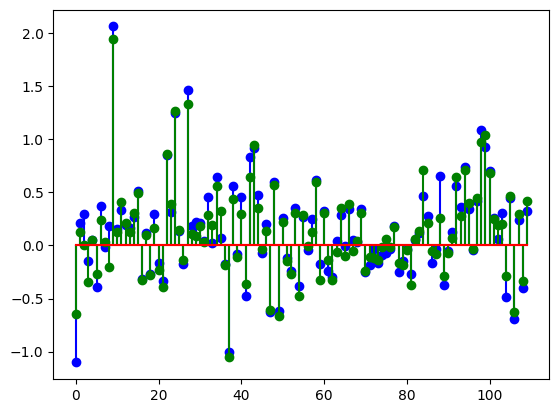

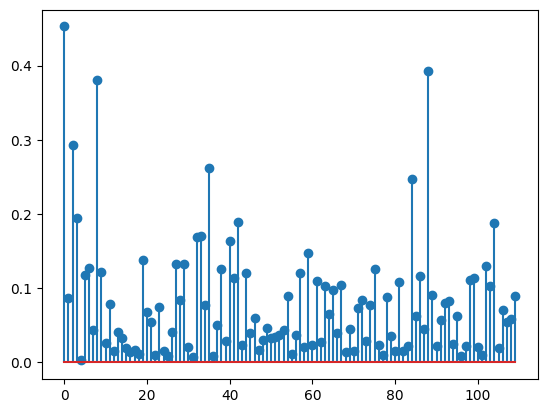

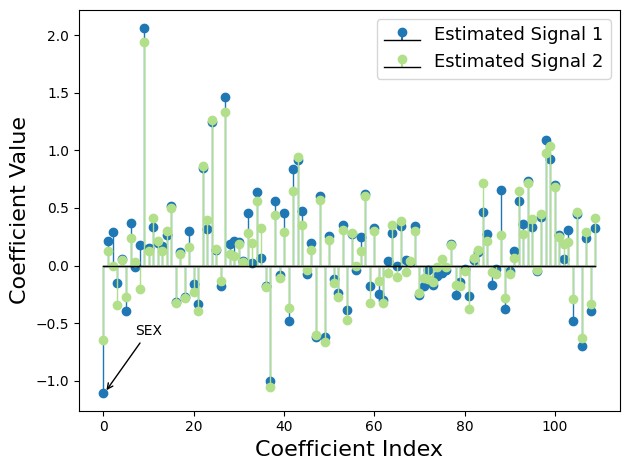

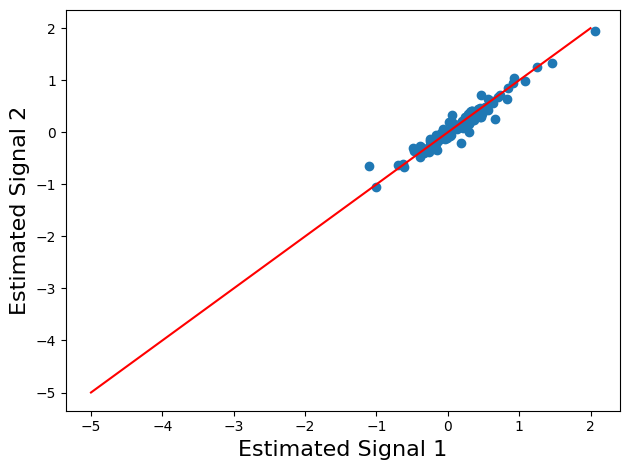

In [9]:
# Make a stem plot for the regression coefficients for each column of B̂
plt.stem(B̂[:, 0], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.stem(B̂[:, 1], linefmt='g-', markerfmt='go', basefmt='r-')
plt.show()

normalized_signal_diff = np.square(B̂[:, 0] - B̂[:, 1]) / np.square(B̂[:, 0])
signal_diff = np.abs(B̂[:, 0] - B̂[:, 1])
plt.stem(signal_diff)
plt.show()

# Make a pretty stem plot comparing the coefficients of the two signals
# plt.figure(figsize=(10, 5))
(m1, s1, b1) = plt.stem(B̂[:, 0], linefmt='b-', markerfmt='bo', basefmt='r-', label='Estimated Signal 1')
# (m1, s1, b1) = plt.stem(B̂[:, 0])
(m2, s2, b2) = plt.stem(B̂[:, 1], linefmt='g-', markerfmt='go', basefmt='r-', label='Estimated Signal 2')
# (markers, stemlines, baseline) = plt.stem(values)
plt.setp(m1, linestyle="", color=PAL_bg[1], linewidth=1)
plt.setp(s1, linestyle="-", color=PAL_bg[1], linewidth=1)
plt.setp(b1, linestyle="-", color="black", linewidth=1)
plt.setp(m2, linestyle="", color=PAL_bg[2], linewidth=1)
plt.setp(s2, linestyle="-", color=PAL_bg[2], linewidth=1)
plt.setp(b2, linestyle="-", color="black", linewidth=1)
plt.xlabel("Coefficient Index", fontsize=16)
plt.ylabel("Coefficient Value", fontsize=16)
plt.legend(prop={'size': 13})
# Add an arrow pointing to the value at index zero, labelled "SEX"
plt.annotate('SEX', xy=(0.3, B̂[0, 0]), xytext=(7, B̂[0, 0] + 0.5), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()

plt.savefig("figures/myocardial_AMP_stemplot_annotated.pdf", bbox_inches='tight')
# import tikzplotlib
# tikzplotlib.save("figures/myocardial_AMP_stemplot.tex")
plt.show()


# Plot both vectors of coefficients against each other
plt.scatter(B̂[:, 0], B̂[:, 1], color=PAL_bg[1])
# Plot a line of slope 1
plt.plot([-5, 2], [-5, 2], color = 'r')
plt.xlabel("Estimated Signal 1", fontsize=16)
plt.ylabel("Estimated Signal 2", fontsize=16)

plt.tight_layout()
plt.savefig("figures/myocardial_AMP_signals_scatter.pdf", bbox_inches='tight')
import tikzplotlib
tikzplotlib.save("figures/myocardial_AMP_signals_scatter.tex")
plt.show()

In [10]:
# Inspect the top k coefficients

k = 10
argmax_coefficients = np.argsort(np.abs(B̂[:, 0]))[-k:]

print("Top 10 largest coeffs: ", argmax_coefficients)
print("Top 10 largest coeffs: ", X.columns[argmax_coefficients + 1]) # +1 because the first column is 'AGE'

Top 10 largest coeffs:  [42 22 43 99 37 98  0 24 27  9]
Top 10 largest coeffs:  Index(['ant_im', 'np_09', 'lat_im', 'NA_R_3_n', 'K_SH_POST', 'NA_R_2_n', 'SEX',
       'endocr_01', 'zab_leg_01', 'ZSN_A'],
      dtype='object')


  0%|          | 0/10 [00:00<?, ?it/s]

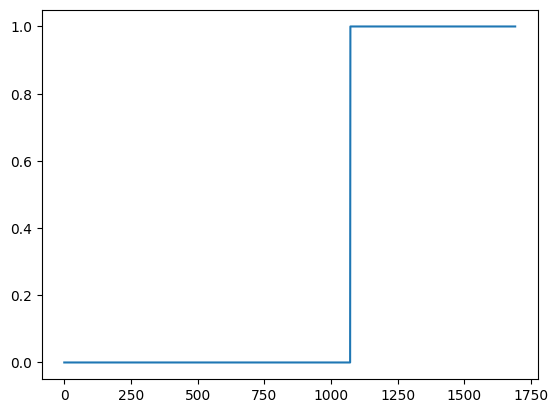

In [11]:
# Fix the change point to the estimated value, and run AMP again to obtain the vector of regression coefficients

# fix the change point to the estimated value
argmax_post = np.argmax(amp_post)
C_fixed = np.zeros(n).astype(int)
C_fixed[unique_age_indices[argmax_post]:] = 1

plt.plot(C_fixed)
# --- Preliminaries ---

T = 10
σ = 0.1
L = 2
ϕ = np.zeros((L, n))
ϕ[0, unique_age_indices[argmax_post]:] = 1
ϕ[1, 0:unique_age_indices[argmax_post]] = 1

# Gaussian Signal Prior
B̃_cov = 1.0 * np.eye(L)
B̃_cov[0, 1] = 0.75
B̃_cov[1, 0] = 0.75
signal_prior = GaussianSignal(B̃_cov)

B̃ = signal_prior.sample(p)
ρ = 1/δ * 1/p * B̃.T @ B̃
B̂_0 = signal_prior.sample(p)

# Generate the observation vector Y
# X_prep = np.random.normal(0, np.sqrt(1/n), (n, p))
# Θ = X @ B̃
# ε = np.random.rand(n) # uniform dist
C_true = jnp.zeros(n).astype(int) # This is just a dummy variable that needs to be passed in for the GAMP function in order for it to run, it is not the actual true change point location
# Y = q(Θ, jnp.ones(n).astype(int), ε) 

B̂, Θ_t, ν_arr, κ_T_arr, ν̂_arr, κ_B_arr, ν_fixed_arr, κ_T_fixed_arr, ν̂_fixed_arr, κ_B_fixed_arr = GAMP_full(B̃, δ, p, ϕ, σ, X_prep, y_prep, C_true, T, B̂_0, signal_prior, signal_prior, st_ζ = None, verbose = False, seed = None, tqdm_disable = False)
ν = ν_arr[-1]
κ_T = κ_T_arr[-1]
ν_fixed = ν_fixed_arr[-1]
κ_T_fixed = κ_T_fixed_arr[-1]

# ν_fixed_tabulated, κ_T_fixed_tabulated = amp.posterior_logistic.tabulate_state_evolution(η_arr_subsampled, signal_prior, signal_prior, \
#                             δ, p, ϕ, L, σ, T, \
#                             ν_arr, κ_T_arr, ν̂_arr, κ_B_arr, st_ζ = None, tqdm_disable = False)


# amp_post = amp.posterior_logistic.exact_posterior(η_arr_subsampled, p_η_arr_subsampled, Θ_t, y_prep, ρ, σ, ν_fixed_tabulated, κ_T_fixed_tabulated) # σ is only passed in for consistency but is not used


In [12]:
# Sort signal differences in descending order, and select the indices of the top 10 largest differences
argmax_signal_diff = np.argsort(signal_diff)[::-1][:10]
print("Top 10 largest differences: ", argmax_signal_diff)
print("Top 10 largest differences: ", signal_diff[argmax_signal_diff])
print("Top 10 largest differences: ", X.columns[argmax_signal_diff + 1]) # +1 because the first column is 'AGE'

Top 10 largest differences:  [  0  88   8   2  35  84   3  42 104  33]
Top 10 largest differences:  [0.45269752 0.39328721 0.38063539 0.29304    0.26170206 0.24716327
 0.19489745 0.18975961 0.18847983 0.17083632]
Top 10 largest differences:  Index(['SEX', 'ROE', 'DLIT_AG', 'STENOK_AN', 'D_AD_ORIT', 'ALT_BLOOD',
       'FK_STENOK', 'ant_im', 'B_BLOK_S_n', 'D_AD_KBRIG'],
      dtype='object')


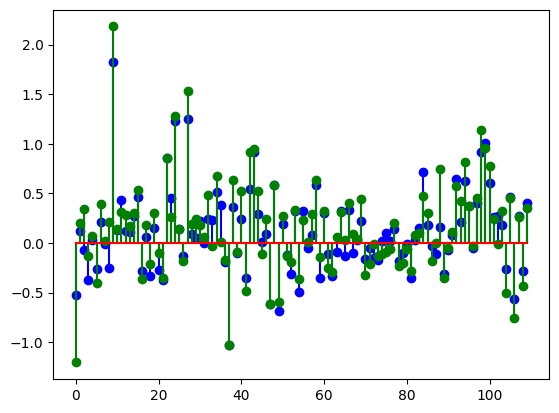

<StemContainer object of 3 artists>

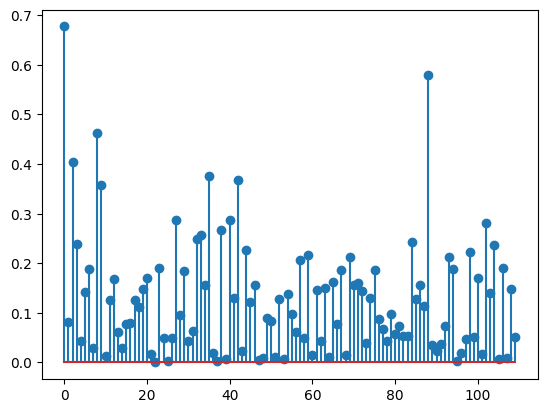

In [13]:
# Make a stem plot for the regression coefficients for each column of B̂
plt.stem(B̂[:, 0], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.stem(B̂[:, 1], linefmt='g-', markerfmt='go', basefmt='r-')
plt.show()

signal_diff = np.abs(B̂[:, 0] - B̂[:, 1])
plt.stem(signal_diff)

In [14]:
# Sort signal differences in descending order, and select the indices of the top 10 largest differences
argmax_signal_diff = np.argsort(signal_diff)[::-1][:10]
print("Top 10 largest differences: ", argmax_signal_diff)
print("Top 10 largest differences: ", signal_diff[argmax_signal_diff])
print("Top 10 largest differences: ", X.columns[argmax_signal_diff + 1]) # +1 because the first column is 'AGE'

Top 10 largest differences:  [  0  88   8   2  35  42   9  40  27 102]
Top 10 largest differences:  [0.67743418 0.57895106 0.46309289 0.40480142 0.37497261 0.36808549
 0.35715625 0.28721228 0.2871465  0.28095349]
Top 10 largest differences:  Index(['SEX', 'ROE', 'DLIT_AG', 'STENOK_AN', 'D_AD_ORIT', 'ant_im', 'ZSN_A',
       'GT_POST', 'zab_leg_01', 'NOT_NA_3_n'],
      dtype='object')


# Logistic Regression: No Intercept.  

Number of samples for signal 1:  1073
Number of samples for signal 2:  619
n, p, δ_1, δ_2:  1692 110 9.754545454545454 5.627272727272727
Proportion of 0s and 1s in the target variable for signal 1:  0.8052190121155638 0.19478098788443615
Proportion of 0s and 1s in the target variable for signal 2:  0.7043618739903069 0.2956381260096931
Coefficients of the first logistic regression model:  [[-2.71255707e+01  2.26931147e+01  1.57992166e+01  1.81441835e+01
  -1.07047685e+01 -6.34535108e+00 -5.45334232e+00 -1.24237358e+01
   2.52063464e+01  6.19663446e+01 -9.36866756e+00  2.25520255e+02
   3.55969584e+01  5.85343728e+00  8.57008273e+00  1.14292664e+02
  -1.58358463e+01  1.66082524e+02 -5.17722996e+00  2.88260000e+01
   1.20929683e+02 -7.90548770e+00  1.69943579e+02 -2.22554518e-01
   1.95571069e+01  3.98416042e+00 -2.17817851e+01  1.34816974e+01
  -4.67278518e+00  6.34669397e+00 -2.84182768e+00 -2.92277443e+00
  -3.35724248e-01 -5.77495178e+01 -3.04217098e+01 -1.32315242e+00
   1.71008666e

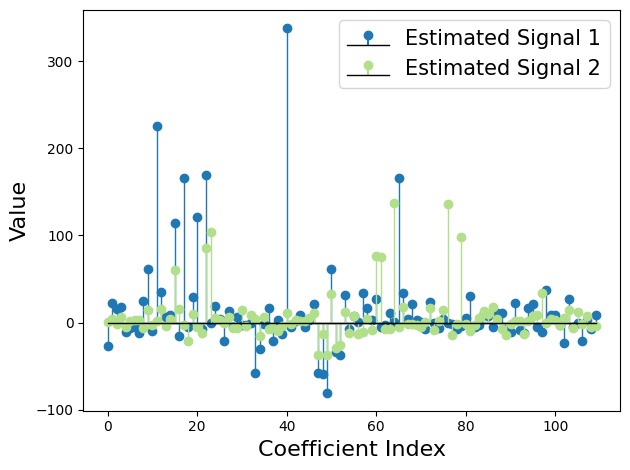

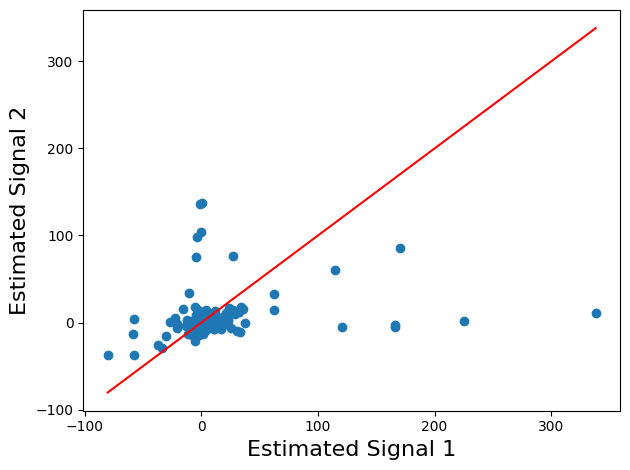

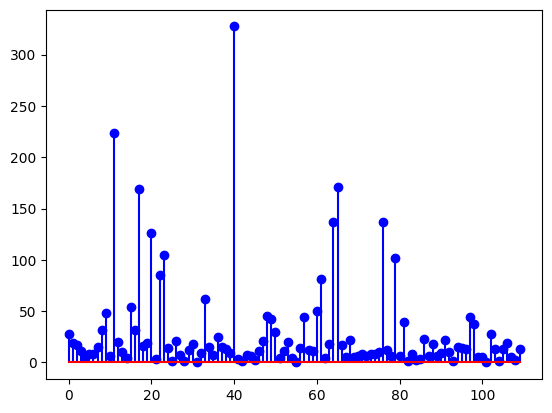

Top 10 largest differences:  [40 11 65 17 76 64 20 23 79 22]
Top 10 largest differences:  [327.40854351 223.62590453 170.9373117  169.47755161 136.83819967
 136.51492957 125.82158689 104.68565518 102.13042559  84.76359736]
Top 10 largest differences:  Index(['GT_POST', 'nr_01', 'n_p_ecg_p_05', 'np_01', 'fibr_ter_05',
       'n_p_ecg_p_04', 'np_07', 'np_10', 'fibr_ter_08', 'np_09'],
      dtype='object')
Top 10 largest coefficients:  [40 11 22 17 65 20 15 49 50  9]
Top 10 largest coefficients:  [338.12541203 225.52025533 169.94357898 166.08252417 165.79123781
 120.92968318 114.29266368 -80.38910928  62.06448743  61.96634458]
Top 10 largest coefficients:  Index(['GT_POST', 'nr_01', 'np_09', 'np_01', 'n_p_ecg_p_05', 'np_07', 'nr_07',
       'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ZSN_A'],
      dtype='object')


In [43]:
# Run logistic regression for each segment of the data

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

chgpt_idx = unique_age_indices[argmax_post]

print("Number of samples for signal 1: ", chgpt_idx)
print("Number of samples for signal 2: ", n - chgpt_idx)
print("n, p, δ_1, δ_2: ", n, p, chgpt_idx/p, (n - chgpt_idx)/p)
print("Proportion of 0s and 1s in the target variable for signal 1: ", (y_prep[0:chgpt_idx] == 0).sum() / chgpt_idx, (y_prep[0:chgpt_idx] == 1).sum() / chgpt_idx)
print("Proportion of 0s and 1s in the target variable for signal 2: ", (y_prep[chgpt_idx:] == 0).sum() / (n - chgpt_idx), (y_prep[chgpt_idx:] == 1).sum() / (n - chgpt_idx))

lr_1 = LogisticRegressionCV(cv = 5, Cs = 10, fit_intercept = False).fit(X_prep[0:chgpt_idx, :], y_prep[0:chgpt_idx])
lr_2 = LogisticRegressionCV(cv = 5, Cs = 10, fit_intercept = False).fit(X_prep[chgpt_idx:, :], y_prep[chgpt_idx:])

# Run logistic regression as above but with cross validation
# from sklearn.model_selection import cross_val_score
# lr_1_cv = LogisticRegression(fit_intercept = False)
# lr_2_cv = LogisticRegression(fit_intercept = False)



# Inspect the coefficients of the logistic regression models
print("Coefficients of the first logistic regression model: ", lr_1.coef_)
print("Coefficients of the second logistic regression model: ", lr_2.coef_)
print("Intercept of the first logistic regression model: ", lr_1.intercept_)
print("Intercept of the second logistic regression model: ", lr_2.intercept_)
print("Scores: ", lr_1.scores_, lr_2.scores_)

# Make a stem plot for the regression coefficients for each column of B̂
(m1, s1, b1) = plt.stem(lr_1.coef_.flatten(), linefmt='b-', markerfmt='bo', basefmt='r-', label='Estimated Signal 1')
(m2, s2, b2) = plt.stem(lr_2.coef_.flatten(), linefmt='g-', markerfmt='go', basefmt='r-', label='Estimated Signal 2')
plt.setp(m1, linestyle="", color=PAL_bg[1], linewidth=1)
plt.setp(s1, linestyle="-", color=PAL_bg[1], linewidth=1)
plt.setp(b1, linestyle="-", color="black", linewidth=1)
plt.setp(m2, linestyle="", color=PAL_bg[2], linewidth=1)
plt.setp(s2, linestyle="-", color=PAL_bg[2], linewidth=1)
plt.setp(b2, linestyle="-", color="black", linewidth=1)
plt.legend(prop={'size': 15})
plt.xlabel("Coefficient Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.tight_layout()


plt.savefig("figures/myocardial_logistic_regression_no_intercept_stemplot.pdf", bbox_inches='tight')
# import tikzplotlib
# tikzplotlib.save("figures/myocardial_logistic_regression_stemplot.tex")
plt.show()

# Plot both vectors of coefficients against each other
plt.scatter(lr_1.coef_.flatten(), lr_2.coef_.flatten(), c=PAL_bg[1])
max_coeff = max(lr_1.coef_.flatten().max(), lr_2.coef_.flatten().max())
min_coeff = min(lr_1.coef_.flatten().min(), lr_2.coef_.flatten().min())
# Plot a line of slope 1
plt.plot([min_coeff, max_coeff], [min_coeff, max_coeff], color='r')
plt.xlabel("Estimated Signal 1", fontsize=16)
plt.ylabel("Estimated Signal 2", fontsize=16)
plt.tight_layout()

plt.savefig("figures/myocardial_logistic_regression_no_intercept_signals_scatter.pdf", bbox_inches='tight')
import tikzplotlib
tikzplotlib.save("figures/myocardial_logistic_regression_no_intercept_signals_scatter.tex")
plt.show()

# Make a stem plot for the difference in regression coefficients for each column of B̂
plt.stem(np.abs(lr_1.coef_.flatten() - lr_2.coef_.flatten()), linefmt='b-', markerfmt='bo', basefmt='r-')
plt.show()

# Sort signal differences in descending order, and select the indices of the top 10 largest differences
argmax_signal_diff = np.argsort(np.abs(lr_1.coef_.flatten() - lr_2.coef_.flatten()))[::-1][:10]
print("Top 10 largest differences: ", argmax_signal_diff)
print("Top 10 largest differences: ", np.abs(lr_1.coef_.flatten() - lr_2.coef_.flatten())[argmax_signal_diff])
print("Top 10 largest differences: ", X.columns[argmax_signal_diff + 1]) # +1 because the first column is 'AGE'

# select the indices of the top 10 largest coefficients
argmax_coeff = np.argsort(np.abs(lr_1.coef_.flatten()))[::-1][:10]
print("Top 10 largest coefficients: ", argmax_coeff)
print("Top 10 largest coefficients: ", lr_1.coef_.flatten()[argmax_coeff])
print("Top 10 largest coefficients: ", X.columns[argmax_coeff + 1]) # +1 because the first column is 'AGE'

# Logistic regression WITH intercept

Number of samples for signal 1:  1073
Number of samples for signal 2:  619
n, p, δ_1, δ_2:  1692 110 9.754545454545454 5.627272727272727
Proportion of 0s and 1s in the target variable for signal 1:  0.8052190121155638 0.19478098788443615
Proportion of 0s and 1s in the target variable for signal 2:  0.7043618739903069 0.2956381260096931


/Users/gabrielarpino/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gabrielarpino/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Coefficients of the first logistic regression model:  [[-3.11985522e-01  1.11168034e-01  8.32277566e-02 -2.70793432e-02
   9.43627054e-02 -1.95636692e-01  9.65236815e-02  5.50062017e-02
  -9.95750021e-02  9.30045514e-01  9.33558847e-02 -1.70431196e-01
   2.63774870e-01  1.40165546e-01 -3.58791805e-02  3.27292343e-01
  -1.59123468e-01  1.63931978e-01 -6.49893502e-02  2.02547765e-01
   1.74258272e-02 -1.00010930e-01  3.08630027e-01 -1.02530462e-01
   5.19457092e-01  1.38777541e-01 -1.47068770e-01  7.60764507e-01
   4.87948328e-02  1.54413125e-01  1.30077170e-01  1.42966122e-01
   1.97988623e-01 -1.36780823e-02  1.80947707e-01 -5.13310466e-02
  -1.66471134e-01 -3.93531246e-01  3.15153994e-01 -9.04594268e-02
   3.26540874e-01 -2.58071251e-01  6.71033004e-01  5.30849106e-01
   3.14076949e-01 -1.05682217e-01  1.97461863e-01  1.70192643e-02
   1.35566688e-01 -1.99730490e-01  3.01024194e-01  3.88146819e-02
   3.05823252e-03 -1.12041894e-01 -1.10281327e-01  9.38504155e-02
   9.92572539e-02  5.2

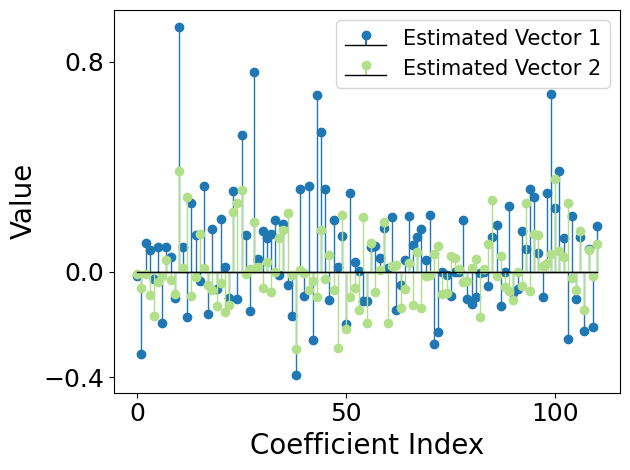

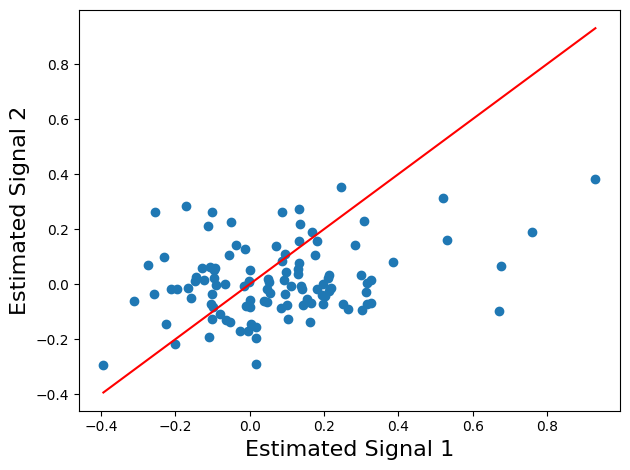

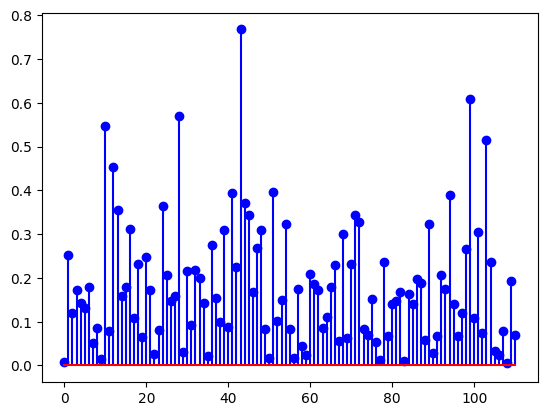

Top 10 largest differences:  [ 43  99  28  10 103  12  51  41  94  44]
Top 10 largest differences:  [0.76720746 0.60800874 0.57033017 0.54710824 0.51573656 0.45396113
 0.395332   0.3939395  0.38879322 0.36998666]
Top 10 largest differences:  Index(['lat_im', 'NA_R_3_n', 'zab_leg_02', 'nr_11', 'LID_S_n', 'nr_02',
       'ritm_ecg_p_07', 'FIB_G_POST', 'NOT_NA_KB', 'inf_im'],
      dtype='object')
Top 10 largest coefficients:  [ 10  28  99  43  44  25  38 101  16  41]
Top 10 largest coefficients:  [ 0.93004551  0.76076451  0.67556333  0.671033    0.53084911  0.51945709
 -0.39353125  0.38555416  0.32729234  0.32654087]
Top 10 largest coefficients:  Index(['nr_11', 'zab_leg_02', 'NA_R_3_n', 'lat_im', 'inf_im', 'endocr_02',
       'MP_TP_POST', 'NOT_NA_2_n', 'nr_08', 'FIB_G_POST'],
      dtype='object')
Normalized correlation between the two signals:  0.08953535758601212
Squared Norm of the first signal:  5.938130181436832
Squared Norm of the second signal:  1.8984667426200612


In [28]:
# Run logistic regression for each segment of the data

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

chgpt_idx = unique_age_indices[argmax_post]

print("Number of samples for signal 1: ", chgpt_idx)
print("Number of samples for signal 2: ", n - chgpt_idx)
print("n, p, δ_1, δ_2: ", n, p, chgpt_idx/p, (n - chgpt_idx)/p)
print("Proportion of 0s and 1s in the target variable for signal 1: ", (y_prep[0:chgpt_idx] == 0).sum() / chgpt_idx, (y_prep[0:chgpt_idx] == 1).sum() / chgpt_idx)
print("Proportion of 0s and 1s in the target variable for signal 2: ", (y_prep[chgpt_idx:] == 0).sum() / (n - chgpt_idx), (y_prep[chgpt_idx:] == 1).sum() / (n - chgpt_idx))

lr_1 = LogisticRegressionCV(cv = 5, Cs = 10, fit_intercept = True, class_weight = 'balanced').fit(X_prep[0:chgpt_idx, :], y_prep[0:chgpt_idx])
lr_2 = LogisticRegressionCV(cv = 5, Cs = 10, fit_intercept = True, class_weight = 'balanced').fit(X_prep[chgpt_idx:, :], y_prep[chgpt_idx:])

# Run logistic regression as above but with cross validation
# from sklearn.model_selection import cross_val_score
# lr_1_cv = LogisticRegression(fit_intercept = False)
# lr_2_cv = LogisticRegression(fit_intercept = False)

# Inspect the coefficients of the logistic regression models
print("Coefficients of the first logistic regression model: ", lr_1.coef_)
print("Coefficients of the second logistic regression model: ", lr_2.coef_)
print("Intercept of the first logistic regression model: ", lr_1.intercept_)
print("Intercept of the second logistic regression model: ", lr_2.intercept_)
print("Scores: ", lr_1.scores_, lr_2.scores_)

# Make a stem plot for the regression coefficients for each column of B̂, including the intercept
lr_1_coef = np.hstack((lr_1.intercept_, lr_1.coef_.flatten())).flatten()
lr_2_coef = np.hstack((lr_2.intercept_, lr_2.coef_.flatten())).flatten()
(m1, s1, b1) = plt.stem(lr_1_coef, linefmt='b-', markerfmt='bo', basefmt='r-', label='Estimated Vector 1')
(m2, s2, b2) = plt.stem(lr_2_coef, linefmt='g-', markerfmt='go', basefmt='r-', label='Estimated Vector 2')
plt.setp(m1, linestyle="", color=PAL_bg[1], linewidth=1)
plt.setp(s1, linestyle="-", color=PAL_bg[1], linewidth=1)
plt.setp(b1, linestyle="-", color="black", linewidth=1)
plt.setp(m2, linestyle="", color=PAL_bg[2], linewidth=1)
plt.setp(s2, linestyle="-", color=PAL_bg[2], linewidth=1)
plt.setp(b2, linestyle="-", color="black", linewidth=1)
plt.legend(prop={'size': 15})
plt.xlabel("Coefficient Index", fontsize=20)
plt.ylabel("Value", fontsize=20)
plt.xticks([0, 50, 100], fontsize=18)
plt.yticks([-0.4, 0, 0.8], fontsize=18)
plt.tight_layout()


plt.savefig("figures/myocardial_logistic_regression_with_intercept_stemplot_larger_vector.pdf", bbox_inches='tight')
# import tikzplotlib
# tikzplotlib.save("figures/myocardial_logistic_regression_stemplot.tex")
plt.show()

# Plot both vectors of coefficients against each other
plt.scatter(lr_1_coef, lr_2_coef, c=PAL_bg[1])
max_coeff = max(lr_1_coef.max(), lr_2_coef.max())
# Plot a line of slope 1
plt.plot([min(lr_1_coef.min(), lr_2_coef.min()), max_coeff], [min(lr_1_coef.min(), lr_2_coef.min()), max_coeff], color='r')
plt.xlabel("Estimated Signal 1", fontsize=16)
plt.ylabel("Estimated Signal 2", fontsize=16)
plt.tight_layout()

plt.savefig("figures/myocardial_logistic_regression_with_intercept_signals_scatter.pdf", bbox_inches='tight')
import tikzplotlib
tikzplotlib.save("figures/myocardial_logistic_regression_with_intercept_signals_scatter.tex")
plt.show()

# Make a stem plot for the difference in regression coefficients for each column of B̂
plt.stem(np.abs(lr_1_coef - lr_2_coef), linefmt='b-', markerfmt='bo', basefmt='r-')
# Set the x-axis to be the column names of the dataset
# plt.xticks(np.arange(p), X.columns)
plt.show()

# Sort signal differences in descending order, and select the indices of the top 10 largest differences
argmax_signal_diff = np.argsort(np.abs(lr_1_coef - lr_2_coef))[::-1][:10]
print("Top 10 largest differences: ", argmax_signal_diff)
print("Top 10 largest differences: ", np.abs(lr_1_coef - lr_2_coef)[argmax_signal_diff])
print("Top 10 largest differences: ", X.columns[argmax_signal_diff + 1]) # +1 because the first column is 'AGE'

# select the indices of the top 10 largest coefficients
argmax_coeff = np.argsort(np.abs(lr_1_coef))[::-1][:10]
print("Top 10 largest coefficients: ", argmax_coeff)
print("Top 10 largest coefficients: ", lr_1_coef[argmax_coeff])
print("Top 10 largest coefficients: ", X.columns[argmax_coeff + 1]) # +1 because the first column is 'AGE'

# Report the normalized correlation between the two signals
print("Normalized correlation between the two signals: ", norm_sq_corr(lr_1_coef, lr_2_coef))

# Report the norm of the two signals
print("Squared Norm of the first signal: ", np.linalg.norm(lr_1_coef)**2)
print("Squared Norm of the second signal: ", np.linalg.norm(lr_2_coef)**2)

### Plot an ordered stemplot with the coefficients

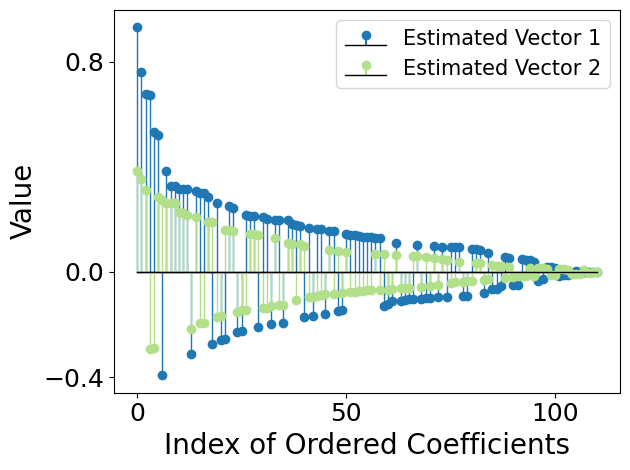

In [33]:
# Make a stem plot for the regression coefficients for each column of B̂, including the intercept
lr_1_coef_ordered = lr_1_coef[np.argsort(np.abs(lr_1_coef))[::-1]]
lr_2_coef_ordered = lr_2_coef[np.argsort(np.abs(lr_2_coef))[::-1]]
(m1, s1, b1) = plt.stem(lr_1_coef_ordered, linefmt='b-', markerfmt='bo', basefmt='r-', label='Estimated Vector 1')
(m2, s2, b2) = plt.stem(lr_2_coef_ordered, linefmt='g-', markerfmt='go', basefmt='r-', label='Estimated Vector 2')
plt.setp(m1, linestyle="", color=PAL_bg[1], linewidth=1)
plt.setp(s1, linestyle="-", color=PAL_bg[1], linewidth=1)
plt.setp(b1, linestyle="-", color="black", linewidth=1)
plt.setp(m2, linestyle="", color=PAL_bg[2], linewidth=1)
plt.setp(s2, linestyle="-", color=PAL_bg[2], linewidth=1)
plt.setp(b2, linestyle="-", color="black", linewidth=1)
plt.legend(prop={'size': 15})
plt.xlabel("Index of Ordered Coefficients", fontsize=20)
plt.ylabel("Value", fontsize=20)
plt.xticks([0, 50, 100], fontsize=18)
plt.yticks([-0.4, 0, 0.8], fontsize=18)
plt.tight_layout()


plt.savefig("figures/myocardial_logistic_regression_with_intercept_stemplot_larger_vector_ordered.pdf", bbox_inches='tight')
# import tikzplotlib
# tikzplotlib.save("figures/myocardial_logistic_regression_stemplot.tex")
plt.show()

# Sanity check with Approximate Posterior using a uniform prior over all one-changepoint configurations

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1674 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1674 [00:00<?, ?it/s]

Change point estimation:  [1065]


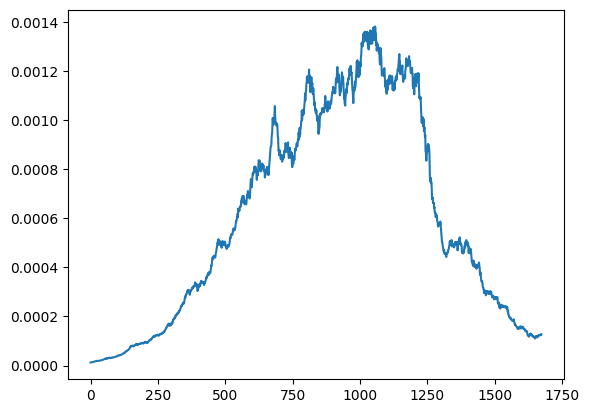

In [16]:
import numpy as np
import jax.numpy as jnp # Not used in any randomness, all randomness is in numpy
import numpy.random as nprandom
import matplotlib.pyplot as plt
from amp import norm_sq_corr, PAL
from amp.marginal_separable_jax_logistic import q, GAMP_full, GAMP_gaussian_clean
import amp.signal_configuration
from amp.signal_configuration import unif_prior_to_η_ϕ, unif_prior_to_η_ϕ_combinations
from amp.signal_priors import SignalPrior, SparseDiffSignal, SparseGaussianSignal, GaussianSignal
import amp.posterior_logistic
from amp.signal_priors import GaussianSignal
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)


# --- Preliminaries ---

T = 10
σ = 0.1
L = 2
# Changepoint locations
Δ = lambda n: int(n/200)
Lmin = L
Lmax = L
# p_l = 1/L * np.ones(L) # puts equal weight on all number of signals, set None otherwise. Best for estimating size. 
p_l = None
num_valid_configs, η_arr, p_η_arr, ϕ = unif_prior_to_η_ϕ_combinations(Lmin, Lmax, Δ(n), n, p_l = p_l) # Lxn matrix
assert η_arr.shape == (num_valid_configs, Lmax-1) and \
    len(p_η_arr) == num_valid_configs
assert ϕ.shape == (Lmax, n)

# Gaussian Signal Prior
B̃_cov = 1.0 * np.eye(L)
B̃_cov[0, 1] = 0.75
B̃_cov[1, 0] = 0.75
signal_prior = GaussianSignal(B̃_cov)

B̃ = signal_prior.sample(p)
ρ = 1/δ * 1/p * B̃.T @ B̃
B̂_0 = signal_prior.sample(p)

# Generate the observation vector Y
# X_prep = np.random.normal(0, np.sqrt(1/n), (n, p))
# Θ = X @ B̃
# ε = np.random.rand(n) # uniform dist
C_true = jnp.zeros(n).astype(int)
# Y = q(Θ, jnp.ones(n).astype(int), ε) 

# B̂, Θ_t, ν_arr, κ_T_arr, ν̂_arr, κ_B_arr, ν_fixed_arr, κ_T_fixed_arr, ν̂_fixed_arr, κ_B_fixed_arr = GAMP_full(B̃, δ, p, ϕ, σ, X_prep, y_prep, C_true, T, B̂_0, signal_prior, signal_prior, st_ζ = None, verbose = False, seed = None, tqdm_disable = False)
B̂, Θ_t, ν, ν̂  = GAMP_gaussian_clean(B̂_0, δ, p, ϕ, L, σ, X_prep, y_prep, ρ, T, prior = None, verbose=False, seed=None, tqdm_disable = False)
κ_T = ν - ν.T @ jnp.linalg.inv(ρ) @ ν

κ_T = ν - ν.T @ jnp.linalg.inv(ρ) @ ν
ψ_arr_amp, η_idx_amp = amp.signal_configuration.η_to_ψ_jax_combinations_mapped(η_arr, n, L)       
post_amp = amp.posterior_logistic.compute_approx_posterior(ψ_arr_amp, Θ_t, y_prep, n, ρ, σ, ν, κ_T)
map_idx_amp = np.argmax(post_amp)
ψ̂ = ψ_arr_amp[map_idx_amp]
η̂ = η_arr[η_idx_amp[map_idx_amp]]
η̂ = η̂[η̂ > 0]
print("Change point estimation: ", η̂)
plt.plot(post_amp)


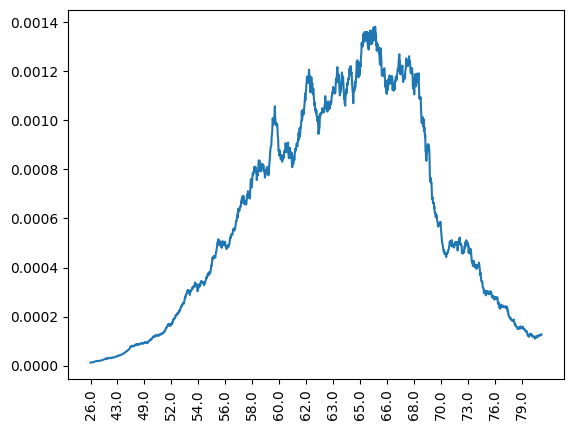

In [17]:
plt.plot(post_amp)
# Label the x-axis ticks with the corresponding ages
plt.xticks(np.arange(0, n, 100), X['AGE'].sort_values().values[::100], rotation=90)
plt.show()